# DIABETES PREDICTION with MACHINE LEARNING

### Author
**IKA NURFITRIANI**

# Introduction
## Dataset Information
This data set has 9 attributes where with this data a model will be created to predict whether a patient has diabetes.

## Dataset Source
The data set that will be used in this project comes from the kaggle website and can be downloaded at the following link: [Dataset link](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)<br>

## Dataset Attributes
1. Pregnancies: To express the Number of pregnancies <br>
2. Glucose: To express the Glucose level in blood <br>
3. BloodPressure: To express the Blood pressure measurement <br>
4. SkinThickness: To express the thickness of the skin <br>
5. Insulin: To express the Insulin level in blood <br>
6. BMI: To express the Body mass index <br>
7. DiabetesPedigreeFunction: To express the Diabetes percentage <br>
8. Age: To express the age <br>
9. Outcome: To express the final result 1 is Yes and 0 is No

## Purpose
This project was created for the following purposes:<br>
● Study the concepts of various machine learning models. <br>
● Implement several models to find models with the best accuracy in predicting diabetes.<br>
● Collect and clean data. <br>
● Execute data exploration and analysis to prepare it for the machine learning model.<br>
● Using the Streamlit framework to build a web interface. <br>
● Allows users to enter data and get diabetes predictions through the web interface.

# A. Import Required Libraries
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.pipeline import make_pipeline
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
print(sklearn.__version__)

1.5.1


# B. Preparation and Exploring Dataset
***

## 1. Data Loading

**Open data/Reading data**

In [3]:
df_diabetes = pd.read_csv("diabetes.csv")
pd.set_option("display.max.columns", None)

**Show the first 5 data and the last 5 data**

In [4]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**View dimension information from the dataset**

In [5]:
rows, columns = df_diabetes.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
768 baris
9 kolom


**View a summary of each column's data type**

In [6]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**View the dataset index range**

In [7]:
df_diabetes.index

RangeIndex(start=0, stop=768, step=1)

**View the dataset index list**

In [8]:
df_diabetes.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

**Show the list of columns in the dataset**

In [9]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**View descriptive statistics**

In [10]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**View the number of unique data**

In [11]:
df_diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## 2. Data Cleaning

**Check missing values**

In [12]:
print("Total missing values semua kolom =", df_diabetes.isnull().sum().sum())
df_diabetes.isnull().sum()

Total missing values semua kolom = 0


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Replacing zero values with NaN**

In [13]:
df_diabetes[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df_diabetes[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

**Check missing values**

In [14]:
df_diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Replacing NaN with mean values**

In [15]:
df_diabetes["Glucose"].fillna(df_diabetes["Glucose"].mean(), inplace = True)
df_diabetes["BloodPressure"].fillna(df_diabetes["BloodPressure"].mean(), inplace = True)
df_diabetes["SkinThickness"].fillna(df_diabetes["SkinThickness"].mean(), inplace = True)
df_diabetes["Insulin"].fillna(df_diabetes["Insulin"].mean(), inplace = True)
df_diabetes["BMI"].fillna(df_diabetes["BMI"].mean(), inplace = True)

**Check missing values**

In [16]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Statistical summary**

In [17]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


**Check duplicated data**

In [18]:
print("Jumlah duplicated data =", df_diabetes.duplicated().sum())

Jumlah duplicated data = 0


**View dimension information from the dataset**

In [19]:
rows, columns = df_diabetes.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
768 baris
9 kolom


**Show the first 5 data and the last 5 data**

In [20]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


# C. Data Visualization
***

**Create 2 graphs simultaneously with subplots**

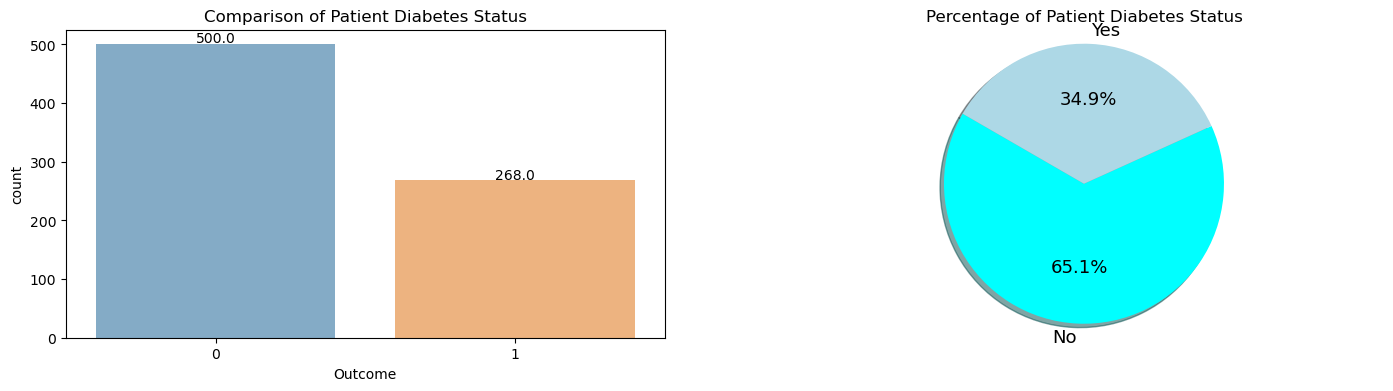

In [21]:
plt.rcParams['figure.figsize']=(17,4)
plt.subplot(121)
plt.title("Comparison of Patient Diabetes Status")
ax = sns.countplot(x='Outcome', data=df_diabetes, alpha=0.6)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,4), textcoords='offset points')

plt.subplot(122)
plt.title("Percentage of Patient Diabetes Status")
patient_values_count = df_diabetes['Outcome'].value_counts()
patient_size = patient_values_count.values.tolist()
patient_labels = 'No', 'Yes'
colors=['aqua', 'lightblue']
pcs, texts, autotexts = plt.pie(patient_size, labels=patient_labels, colors=colors,
                             autopct='%1.1f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()

**Create a histogram for a numeric column**

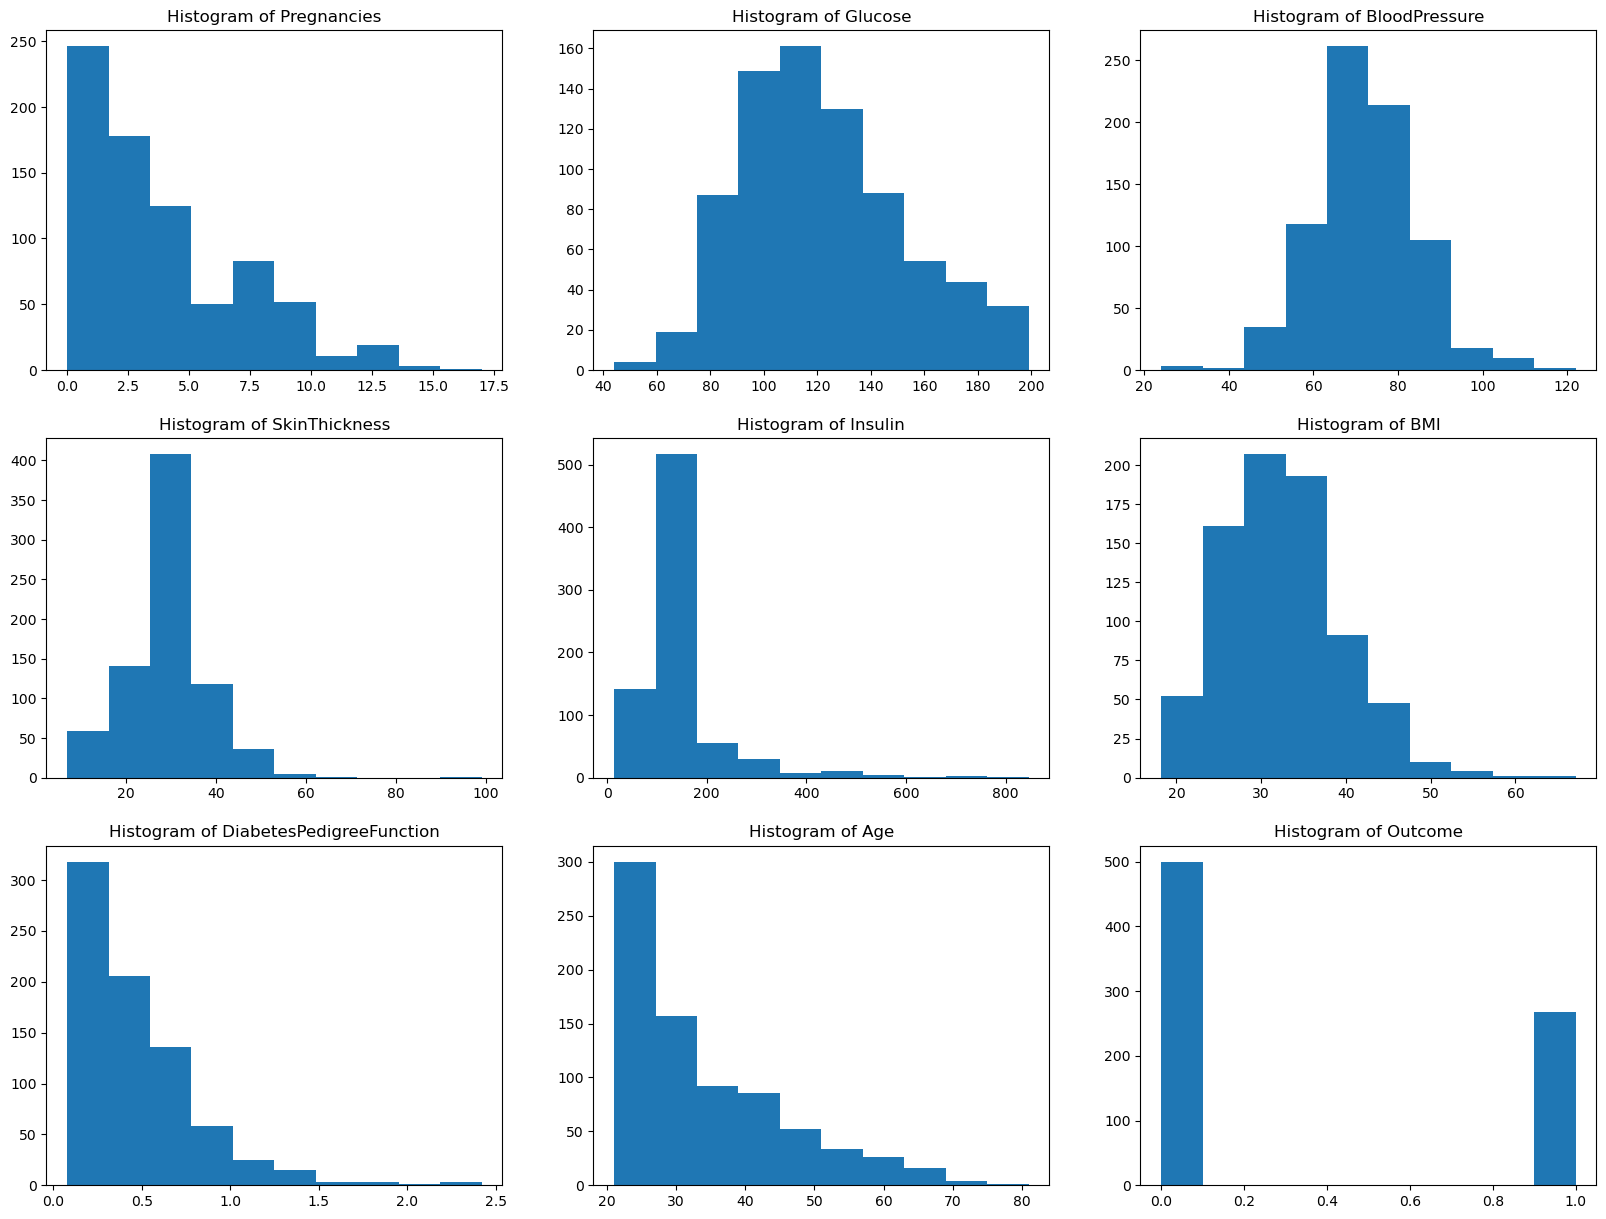

In [22]:
fig, ax = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20,15))
count = 0
for num_col in df_diabetes:
    ax_x = count//3
    ax_y = count%3
    
    ax[ax_x, ax_y].hist(df_diabetes[num_col])
    ax[ax_x, ax_y].set_title(f"Histogram of {num_col}")
    count+=1
plt.show()

**Pair plot of dataset**

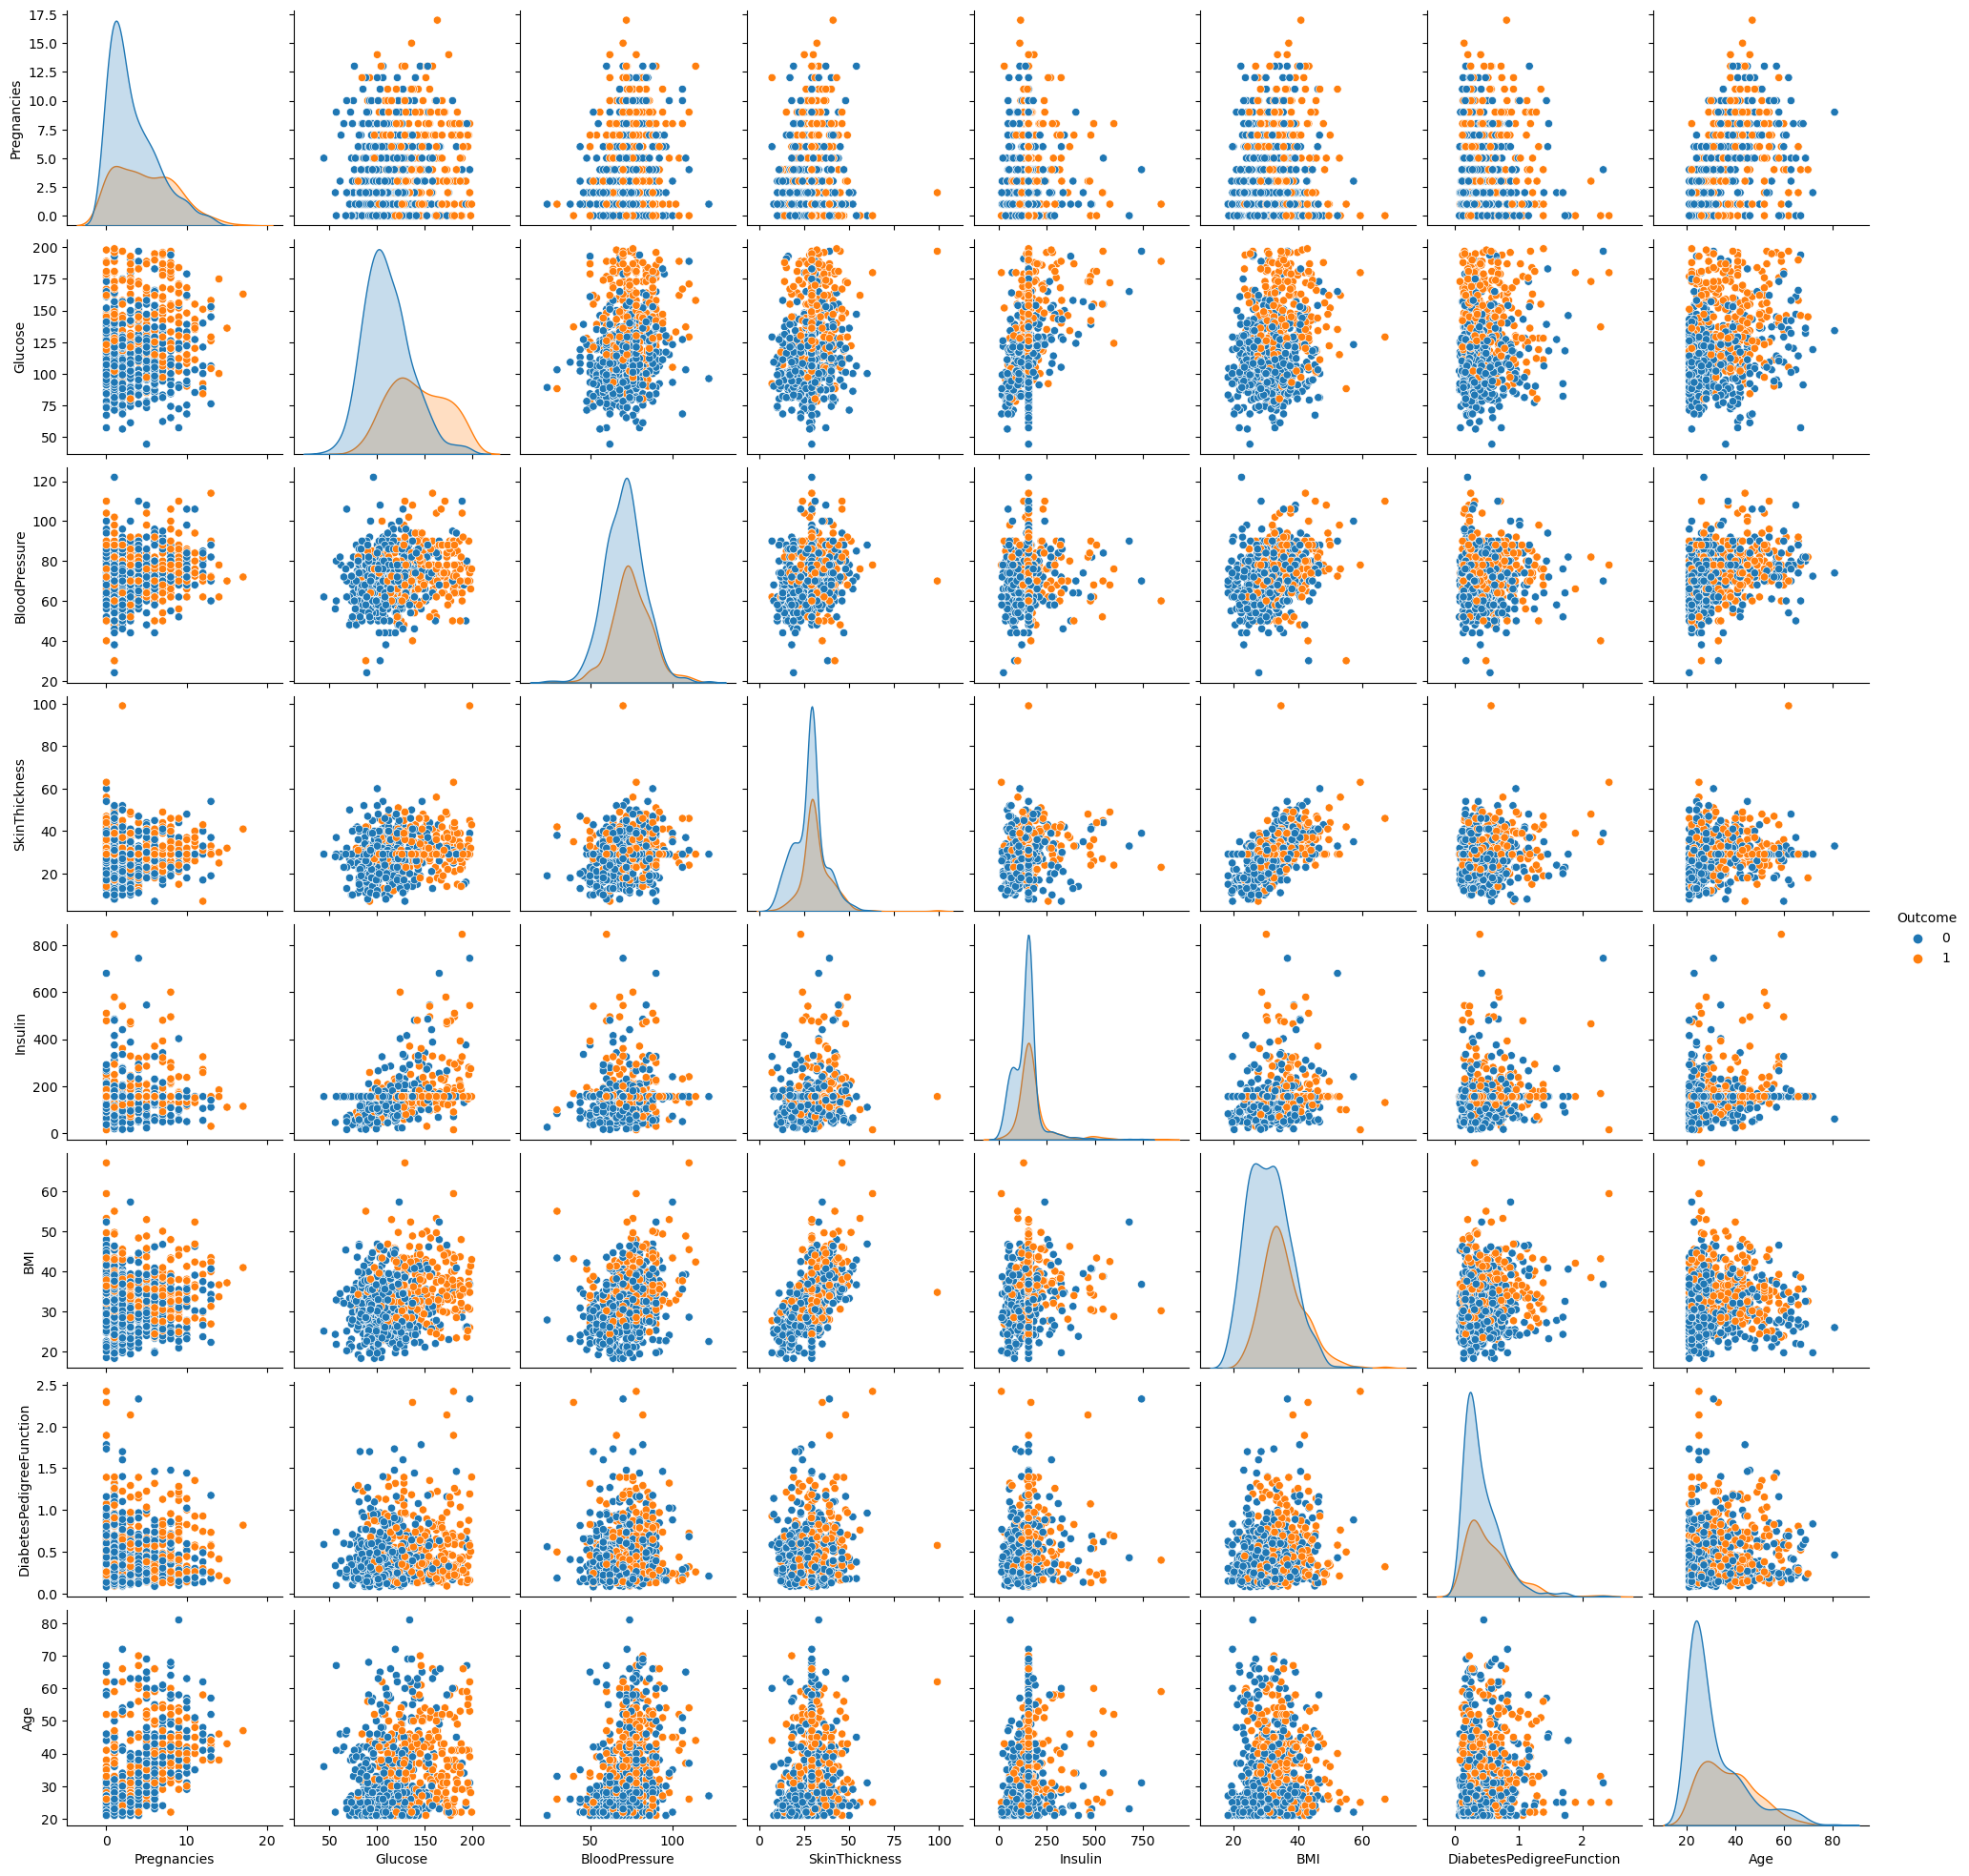

In [23]:
sns.pairplot(data = df_diabetes, hue = 'Outcome')
plt.show()

# D. Prepocessing Data
***

**Show the first 5 data and the last 5 data**

In [24]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


**Selection of features and targets**

In [25]:
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

**Split Dataset**

In [26]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size= 0.2)

**Check the correlation of each feature**

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Pregnancies'),
  Text(0, 1.5, 'Glucose'),
  Text(0, 2.5, 'BloodPressure'),
  Text(0, 3.5, 'SkinThickness'),
  Text(0, 4.5, 'Insulin'),
  Text(0, 5.5, 'BMI'),
  Text(0, 6.5, 'DiabetesPedigreeFunction'),
  Text(0, 7.5, 'Age'),
  Text(0, 8.5, 'Outcome')])

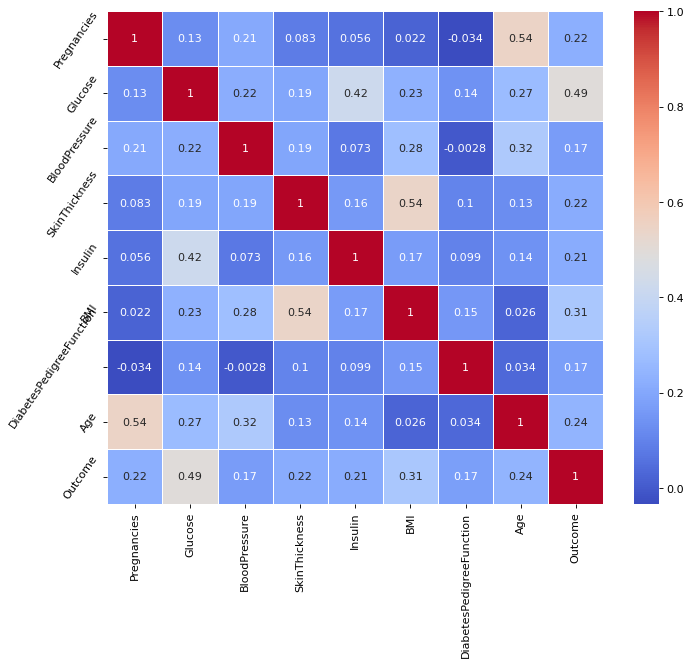

In [28]:
plt.figure(figsize=(10,8), dpi=80)
sns.heatmap(df_diabetes.corr(),cmap="coolwarm",annot=True,linewidth=0.5)
plt.yticks(rotation=55)

**Feature Importance**

Text(0.5, 0, 'Feature Importance')

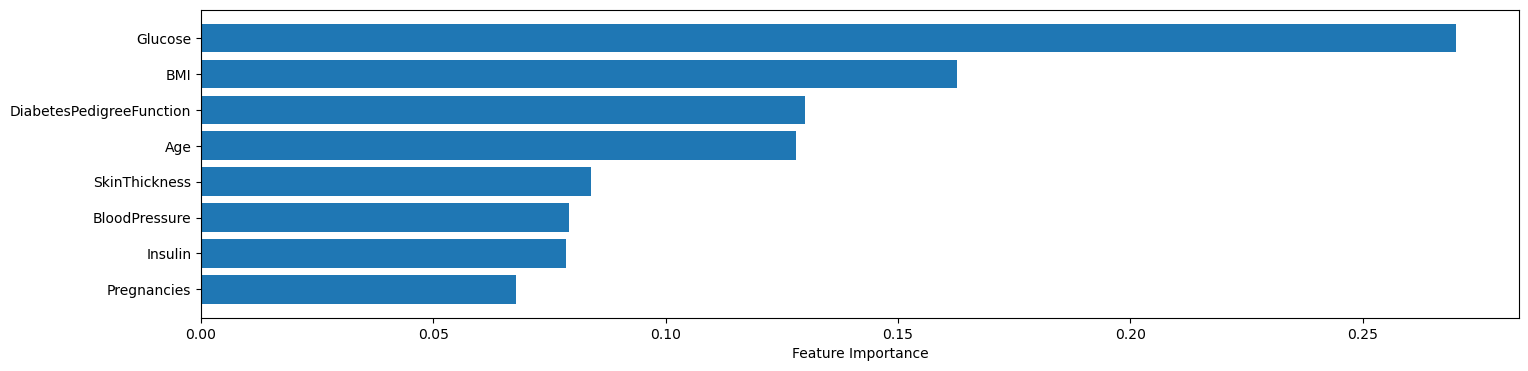

In [29]:
sort = rf.feature_importances_.argsort()
plt.barh(df_diabetes.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

**Show the first 5 data and the last 5 data**

In [30]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


**Selection of features and targets**

In [31]:
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


**Split dataset**

In [33]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=45)

**Scaling data and Transformasi X**

In [34]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**View dimension information from the dataset**

In [35]:
print('Dimensi feature data train =', X_train_scaled.shape)
print('Dimensi target data train =', y_train.shape)
print('Dimensi feature data test =', X_test_scaled.shape)
print('Dimensi target data test =', y_test.shape)

Dimensi feature data train = (614, 8)
Dimensi target data train = (614,)
Dimensi feature data test = (154, 8)
Dimensi target data test = (154,)


# E. Modelling 
***

## 1. Logistic Regression
### Model Definition and Training
**Implementation of Logistic Regression**

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

### Model Evaluation

In [37]:
y_pred1 = logreg.predict(X_test_scaled)

**Implementation of Confusion Matrix**

In [38]:
matrix1 = confusion_matrix(y_test, y_pred1)

**View model evaluation results**

In [39]:
print("Logistic Regression")
print("Accuracy score :", accuracy_score(y_test, y_pred1))
print("Confusion Matrix :\n", matrix1)
print("Classification Report :\n", classification_report(y_test, y_pred1))

Logistic Regression
Accuracy score : 0.7662337662337663
Confusion Matrix :
 [[90 14]
 [22 28]]
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       104
           1       0.67      0.56      0.61        50

    accuracy                           0.77       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



### Heatmap of Confusion Matrix
**Create labels for heatmaps**

In [40]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix1.flatten()/np.sum(matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

**Create a heatmap from the Confusion Matrix**

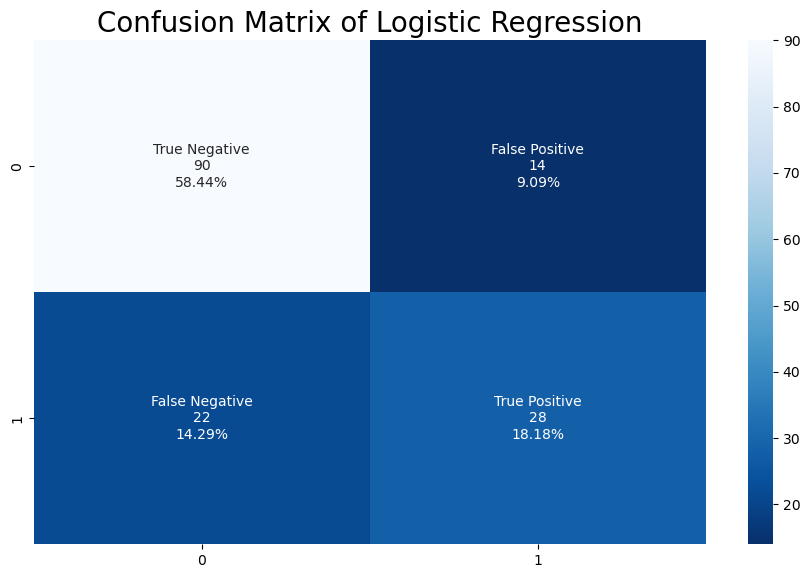

In [41]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix1, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Logistic Regression", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

## 2. Linear Regression
### Model Definition and Training
**Implementation of Linear Regression**

In [42]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

### Model Evaluation

In [43]:
y_pred2 = linear.predict(X_test_scaled)

**Implementation of Confusion Matrix**

In [44]:
y_pred2_labels = (y_pred2 >= 0.5).astype(int)

In [45]:
matrix2 = confusion_matrix(y_test, y_pred2_labels)

**View model evaluation results**

In [46]:
print("Linear Regression")
print("Accuracy score :", accuracy_score(y_test, y_pred2_labels))
print("Confusion Matrix :\n", matrix2)
print("Classification Report :\n", classification_report(y_test, y_pred2_labels))

Linear Regression
Accuracy score : 0.7597402597402597
Confusion Matrix :
 [[89 15]
 [22 28]]
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       104
           1       0.65      0.56      0.60        50

    accuracy                           0.76       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



### Heatmap of Confusion Matrix
**Create labels for heatmaps**

In [47]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix2.flatten()/np.sum(matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

**Create a heatmap from the Confusion Matrix**

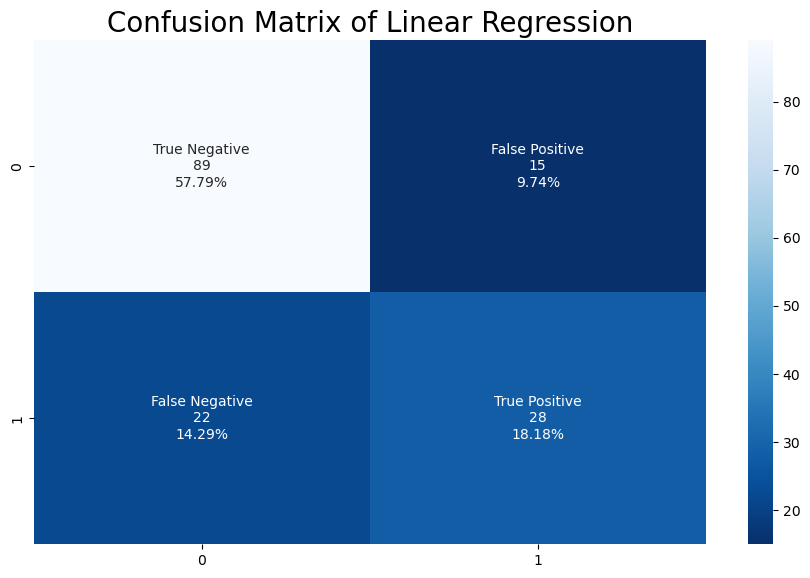

In [48]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Linear Regression", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

## 3. K-Nearest Neighbors (KNN)
### Plotting a graph for n_neighbors

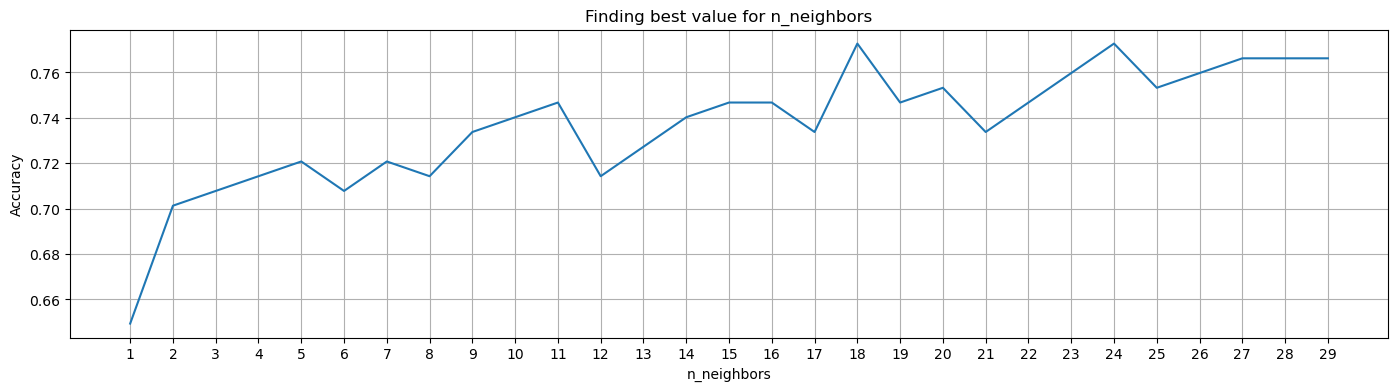

Highest value:  0.7727272727272727


In [49]:
X_axis = list(range(1, 30))
acc = []

for i in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_scaled, y_train)
    predicti = knn_model.predict(X_test_scaled)
    acc.append(metrics.accuracy_score(y_test, predicti))

acc = pd.Series(acc)

plt.plot(X_axis, acc)
plt.xticks(range(1, 30))
plt.title("Finding best value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print('Highest value: ', acc.max())

### Model Definition and Training
**Implementation of K-Nearest Neighbors**

In [50]:
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=24)

### Model Evaluation

In [51]:
y_pred3 = knn.predict(X_test_scaled)

**Implementation of Confusion Matrix**

In [52]:
matrix3 = confusion_matrix(y_test, y_pred3)

**View model evaluation results**

In [53]:
print("K-Nearest Neighbors")
print("Accuracy score :", accuracy_score(y_test, y_pred3))
print("Confusion Matrix :\n", matrix3)
print("Classification Report :\n", classification_report(y_test, y_pred3))

K-Nearest Neighbors
Accuracy score : 0.7727272727272727
Confusion Matrix :
 [[91 13]
 [22 28]]
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.68      0.56      0.62        50

    accuracy                           0.77       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



### Heatmap of Confusion Matrix
**Create labels for heatmaps**

In [54]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix3.flatten()/np.sum(matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

**Create a heatmap from the Confusion Matrix**

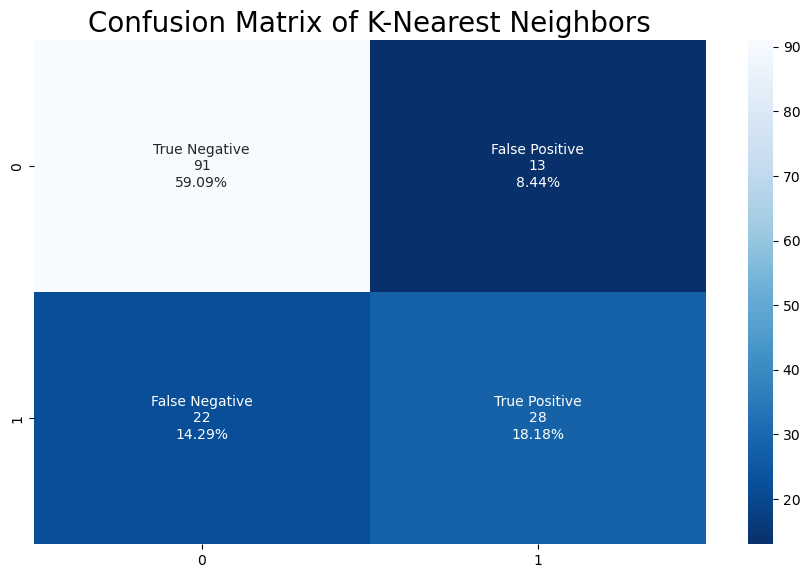

In [55]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix3, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of K-Nearest Neighbors", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

## 4. Support Vector Machine (SVM)
### Model Definition and Training
**Implementation of Support Vector Machine**

In [56]:
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

SVC(probability=True)

### Model Evaluation

In [57]:
y_pred4 = svm.predict(X_test_scaled)

**Implementation of Confusion Matrix**

In [58]:
matrix4 = confusion_matrix(y_test, y_pred4)

**View model evaluation results**

In [59]:
print("Support Vector Machine")
print("Accuracy score :", accuracy_score(y_test, y_pred4))
print("Confusion Matrix :\n", matrix4)
print("Classification Report :\n", classification_report(y_test, y_pred4))

Support Vector Machine
Accuracy score : 0.7792207792207793
Confusion Matrix :
 [[92 12]
 [22 28]]
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.70      0.56      0.62        50

    accuracy                           0.78       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



### Heatmap of Confusion Matrix
**Create labels for heatmaps**

In [60]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix4.flatten()/np.sum(matrix4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

**Create a heatmap from the Confusion Matrix**

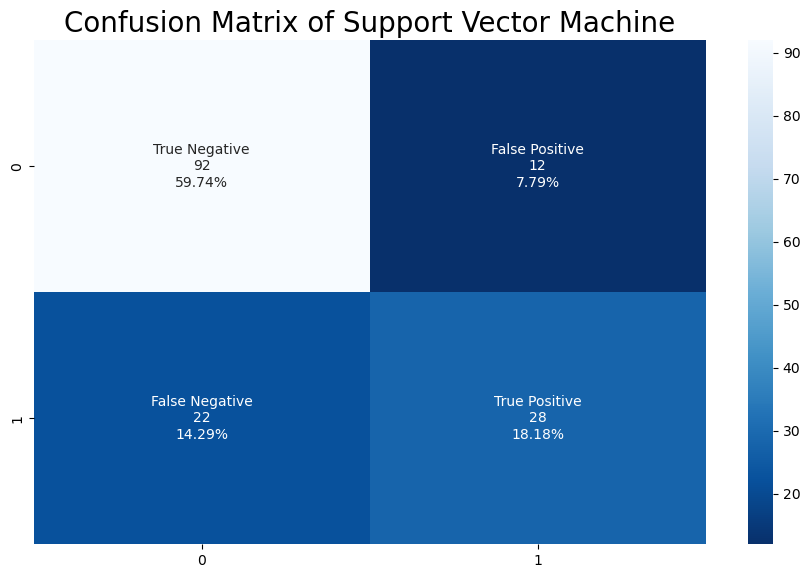

In [61]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix4, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Support Vector Machine", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

## 5. Decision Tree
### Model Definition and Training
**Implementation of Decision Tree**

In [62]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

### Model Evaluation

In [63]:
y_pred5 = dectree.predict(X_test_scaled)

**Implementation of Confusion Matrix**

In [64]:
matrix5 = confusion_matrix(y_test, y_pred5)

**View model evaluation results**

In [65]:
print("Decision Tree")
print("Accuracy score :", accuracy_score(y_test, y_pred5))
print("Confusion Matrix :\n", matrix5)
print("Classification Report :\n", classification_report(y_test, y_pred5))

Decision Tree
Accuracy score : 0.6558441558441559
Confusion Matrix :
 [[73 31]
 [22 28]]
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.70      0.73       104
           1       0.47      0.56      0.51        50

    accuracy                           0.66       154
   macro avg       0.62      0.63      0.62       154
weighted avg       0.67      0.66      0.66       154



### Heatmap of Confusion Matrix
**Create labels for heatmaps**

In [66]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix5.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix5.flatten()/np.sum(matrix5)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

**Create a heatmap from the Confusion Matrix**

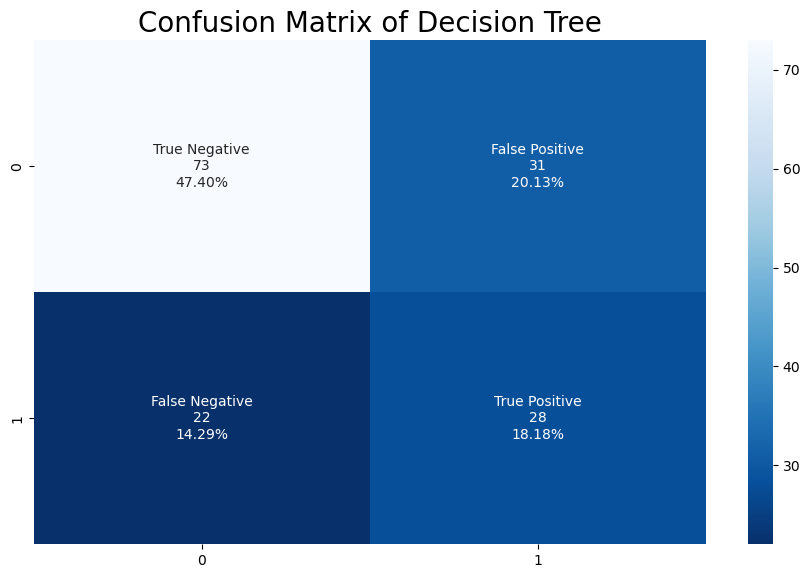

In [67]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix5, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Decision Tree", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

## 6. Random Forest
### Model Definition and Training
**Implementation of Random Forest**

In [68]:
ranfor = RandomForestClassifier()
ranfor.fit(X_train_scaled, y_train)

RandomForestClassifier()

### Model Evaluation

In [69]:
y_pred6 = ranfor.predict(X_test_scaled)

**Implementation of Confusion Matrix**

In [70]:
matrix6 = confusion_matrix(y_test, y_pred6)

**View model evaluation results**

In [71]:
print("Random Forest")
print("Accuracy score :", accuracy_score(y_test, y_pred6))
print("Confusion Matrix :\n", matrix6)
print("Classification Report :\n", classification_report(y_test, y_pred6))

Random Forest
Accuracy score : 0.7467532467532467
Confusion Matrix :
 [[85 19]
 [20 30]]
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       104
           1       0.61      0.60      0.61        50

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



### Heatmap of Confusion Matrix
**Create labels for heatmaps**

In [72]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix6.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix6.flatten()/np.sum(matrix6)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

**Create a heatmap from the Confusion Matrix**

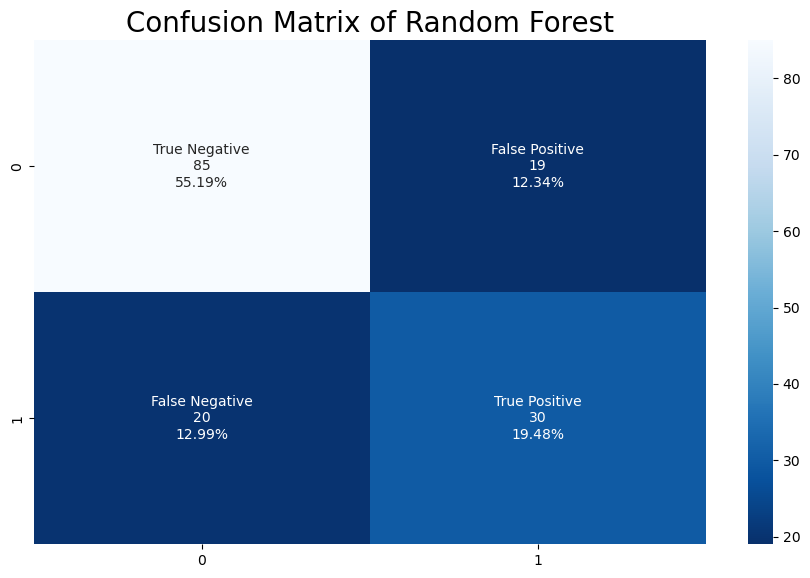

In [73]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix6, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Random Forest", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

## 7. Naive Bayes
### Model Definition and Training
**Implementation of Naive Bayes**

In [74]:
naibay = GaussianNB()
naibay.fit(X_train_scaled, y_train)

GaussianNB()

### Model Evaluation

In [75]:
y_pred7 = naibay.predict(X_test_scaled)

**Implementation of Confusion Matrix**

In [76]:
matrix7 = confusion_matrix(y_test, y_pred7)

**View model evaluation results**

In [77]:
print("Naive Bayes")
print("Accuracy score :", accuracy_score(y_test, y_pred7))
print("Confusion Matrix :\n", matrix7)
print("Classification Report :\n", classification_report(y_test, y_pred7))

Naive Bayes
Accuracy score : 0.7532467532467533
Confusion Matrix :
 [[85 19]
 [19 31]]
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       104
           1       0.62      0.62      0.62        50

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



### Heatmap of Confusion Matrix
**Create labels for heatmaps**

In [78]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix7.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix7.flatten()/np.sum(matrix7)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

**Create a heatmap from the Confusion Matrix**

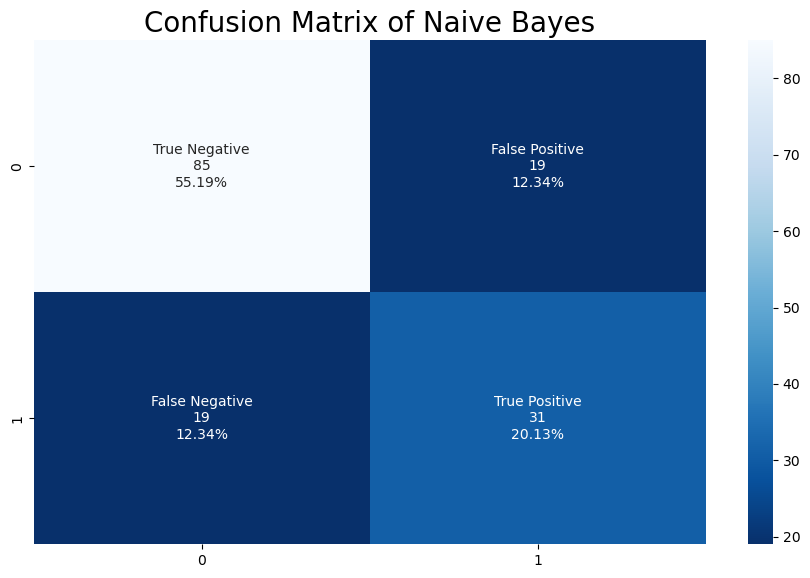

In [79]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix7, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Naive Bayes", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

# F. Algorithm Analysis
***
**Comparing the accuracy results of all models**

In [80]:
print("--- Accuracy Results of All Models ---")
print("Logistic Regression :", accuracy_score(y_test, y_pred1))
print("Linear Regression :", accuracy_score(y_test, y_pred2_labels))
print("K-Nearest Neighbors (KNN) :", accuracy_score(y_test, y_pred3))
print("Support Vector Machine (SVM) :", accuracy_score(y_test, y_pred4))
print("Decision Tree :", accuracy_score(y_test, y_pred5))
print("Random Forest :", accuracy_score(y_test, y_pred6))
print("Naive Bayes :", accuracy_score(y_test, y_pred7))

--- Accuracy Results of All Models ---
Logistic Regression : 0.7662337662337663
Linear Regression : 0.7597402597402597
K-Nearest Neighbors (KNN) : 0.7727272727272727
Support Vector Machine (SVM) : 0.7792207792207793
Decision Tree : 0.6558441558441559
Random Forest : 0.7467532467532467
Naive Bayes : 0.7532467532467533


# G. Inference Model
***
**View the first/top 5 feature data**

In [81]:
X.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
95,6,144.0,72.0,27.00000,228.000000,33.9,0.255,40
96,2,92.0,62.0,28.00000,155.548223,31.6,0.130,24
97,1,71.0,48.0,18.00000,76.000000,20.4,0.323,22
98,6,93.0,50.0,30.00000,64.000000,28.7,0.356,23


In [82]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### **a. First Prediction:**<br>
There is a patient with the following examination results:
- Pregnancies = 3
- Glucose = 106
- BloodPressure = 65
- SkinThickness = 42
- Insulin = 143
- BMI = 42.5
- DiabetesPedigreeFunction = 0.175

The patient is 22 years old. Does this patient have diabetes?

In [83]:
input1 = (3, 106, 65, 42, 143, 42.5, 0.175, 22)
input1_num = np.asarray(input1)
input1_reshaped = input1_num.reshape(1, -1)
input1_data = scaler.transform(input1_reshaped)
prediction1 = svm.predict(input1_data)

In [84]:
if prediction1 == 0:
    print("The person is non-diabetic")
else:
    print("The person is diabetic")

The person is non-diabetic


**Conclusion from the First Prediction:**<br>
The prediction result is 0, which means this patient does not suffer from diabetes.

### **b. Second Prediction:**<br>
There is a patient with the following examination results:
- Pregnancies = 11
- Glucose = 95
- BloodPressure = 73
- SkinThickness = 19
- Insulin = 155
- BMI = 22
- DiabetesPedigreeFunction = 0.6

The patient is 56 years old. Does this patient have diabetes?

In [85]:
input2 = (11, 95, 73, 19, 155, 22, 0.6, 56)
input2_num = np.asarray(input2)
input2_reshaped = input2_num.reshape(1, -1)
input2_data = scaler.transform(input2_reshaped)
prediction2 = svm.predict(input2_data)

In [86]:
if prediction2 == 0:
    print("The person is non-diabetic")
else:
    print("The person is diabetic")

The person is non-diabetic


**Conclusion from the Second Prediction:**<br>
The prediction result is 0, which means this patient does not suffer from diabetes.

### **c. Third Prediction:**<br>
There is a patient with the following examination results:
- Pregnancies = 4
- Glucose = 180
- BloodPressure = 51
- SkinThickness = 37
- Insulin = 160
- BMI = 38
- DiabetesPedigreeFunction = 0.46

The patient is 22 years old. Does this patient have diabetes?

In [87]:
input3 = (4, 180, 51, 37, 160, 38, 0.46, 22)
input3_num = np.asarray(input3)
input3_reshaped = input3_num.reshape(1, -1)
input3_data = scaler.transform(input3_reshaped)
prediction3 = svm.predict(input3_data)

In [88]:
if prediction3 == 0:
    print("The person is non-diabetic")
else:
    print("The person is diabetic")

The person is diabetic


**Conclusion from the Third Prediction:**<br>
The prediction result is 1, which means this patient suffers from diabetes.

### **d. Fourth Prediction:**<br>
There is a patient with the following examination results:
- Pregnancies = 6
- Glucose = 148
- BloodPressure = 72
- SkinThickness = 35
- Insulin = 155
- BMI = 33.6
- DiabetesPedigreeFunction = 0.627

The patient is 50 years old. Does this patient have diabetes?

In [89]:
input4 = (6, 148, 72, 35, 155, 33.6, 0.627, 50)
input4_num = np.asarray(input4)
input4_reshaped = input4_num.reshape(1, -1)
input4_data = scaler.transform(input4_reshaped)
prediction4 = svm.predict(input4_data)

In [90]:
if prediction4 == 0:
    print("The person is non-diabetic")
else:
    print("The person is diabetic")

The person is diabetic


**Conclusion from the Fourth Prediction:**<br>
The prediction result is 1, which means this patient suffers from diabetes.

# H. Save model in picke file
***

In [91]:
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(svm, f)

In [92]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [93]:
pipeSVM = make_pipeline(
    MinMaxScaler(),
    SVC())
pipeSVM.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [94]:
with open("model.pkl", "wb") as f:
    pickle.dump(pipeSVM, f)

In [95]:
with open('scaler_model.pkl', 'wb') as f:
    pickle.dump(pipeSVM.named_steps['minmaxscaler'], f)